# Mini Project 2 - IU 4.5 Statistical Analysis

In [1]:
# Importing the respective libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Q1) Exploratory Data Analysis

In [2]:
# Reading the data set
cats_df = pd.read_csv("Mini_project_2_Data.csv")

# Showing the first few rows
cats_df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


## Exercise

### Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.

### Q1.1 Identify missing value

In [3]:
# Checking if there are any null values
cats_df.isnull()

,userid,version,sum_gamerounds,retention_1,retention_7
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
90184,False,False,False,False,False
90185,False,False,False,False,False
90186,False,False,False,False,False
90187,False,False,False,False,False


From the above table, we can see that there are no null values in the data set given. 

### Q1.2 Identify outliers

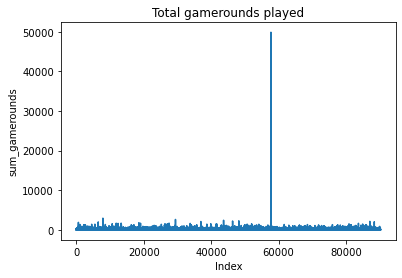

In [4]:
#Check for outlier values in sum_gamerounds column
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(cats_df.sum_gamerounds)

In [5]:
#Locating the information maximum number of gamerounds played using the max() function
cats_df[cats_df['sum_gamerounds'] == max(cats_df['sum_gamerounds'])]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


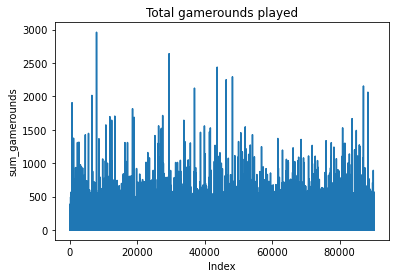

In [6]:
# Counting the number of players for each number of gamerounds 
cats_df_lessmax = cats_df.drop(index=cats_df[cats_df['sum_gamerounds'] == max(cats_df['sum_gamerounds'])].index,inplace=False)

# Plotting the distribution of players after removing the outlier
plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(cats_df_lessmax.sum_gamerounds);

In [7]:
# Getting an overview of the number of rounds played
cats_df_lessmax['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

In [8]:
# Counting the number of players in each group, gate_30 and gate_40 respectively.
cats_df_lessmax['version'].value_counts()

gate_40    45489
gate_30    44699
Name: version, dtype: int64

## Q2. Plot summary statistics and identify trends to answer basis business questions

### Q2.1 What is the overall 7-day retention rate of the game?

In [9]:
#Calculating the overall 7-day retention rate 
ret_7d = cats_df_lessmax[["retention_7"]].mean()*100
print(f"Overall 7-day retention rate of the game is {round(ret_7d[0],2)}%")

Overall 7-day retention rate of the game is 18.61%


### Q2.2 How many players never played the game after installing? 

In [10]:
# Display the number of players who have never played game after they have installed it.
never_played = cats_df_lessmax[cats_df_lessmax['sum_gamerounds'] == 0].userid.count()
print(f'{never_played} players never played the game after installing it.')

3994 players never played the game after installing it.


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

Yes, the number of users decrease as the level progresses.


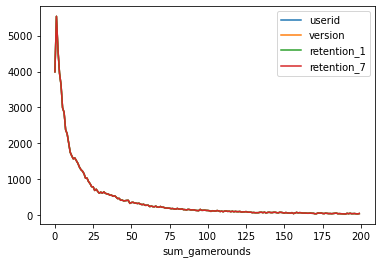

In [23]:
# Counting the number of players for the first 200 gamerounds
cats_df_lessmax.groupby('sum_gamerounds').count().head(200).plot()
print('Yes, the number of users decrease as the level progresses.')

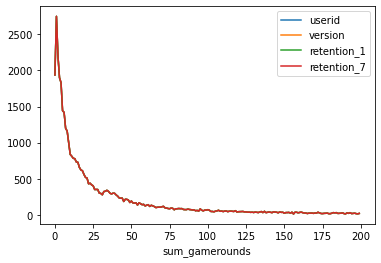

In [11]:
cats_df_lessmax[cats_df_lessmax['version']=='gate_30'].groupby('sum_gamerounds').count().head(200).plot();

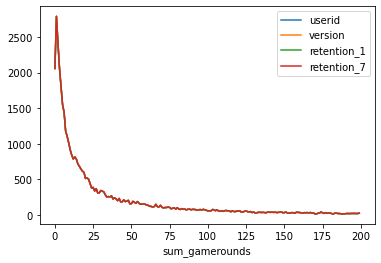

In [12]:
cats_df_lessmax[cats_df_lessmax['version']=='gate_40'].groupby('sum_gamerounds').count().head(200).plot();

## Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [23]:
# Creating a cross tab to summarise the 7-day retention rate for different levels at which the gate was set
crosstab_7d = pd.crosstab(cats_df_lessmax.version, cats_df_lessmax.retention_7).apply(lambda r: r/r.sum(), axis=1)
display(crosstab_7d)

crosstab_1d = pd.crosstab(cats_df_lessmax.version, cats_df_lessmax.retention_1).apply(lambda r: r/r.sum(), axis=1)
display(crosstab_1d)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


retention_1,False,True
version,,
gate_30,0.551802,0.448198
gate_40,0.557717,0.442283


<mark>__Analsysis Results:__
    
Setting the gate at level 30 yields a slightly higher 7-day retention rate, at 19.0%, as compared to the 7-day retention rate when the gate was set at level 40, at 18.2%. It is noted that the proportion of players who did not return to the game after the 7 days of installing is high for both versions of the game. 

### Q3.2 Gamerounds summary for different game versions

In [14]:
# Average gamerounds and Total gamerounds played on different game versions
grouped_avegamerounds = cats_df_lessmax.groupby(['version']).agg({'sum_gamerounds': ['mean','sum']})
grouped_avegamerounds.columns = ['gamerounds_mean', 'gamerounds_total']
grouped_avegamerounds = grouped_avegamerounds.reset_index()
print(f'{grouped_avegamerounds}')

   version  gamerounds_mean  gamerounds_total
0  gate_30        51.342111           2294941
1  gate_40        51.298776           2333530


<mark>__Analysis of Results:__
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 
    
The total number of gamesrounds played by each player increases with different versions of the game, that is, when the gate is set at level 40 as compared to the gate being set at level 30. The total number of gamerounds played at level 40 is higher than the gamerounds played at level 30. 

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [15]:
#Group A = gate_30, Group B = gate_40
gate_30=pd.DataFrame(cats_df_lessmax[cats_df_lessmax.version=="gate_30"]['sum_gamerounds'])
gate_40=pd.DataFrame(cats_df_lessmax[cats_df_lessmax.version=="gate_40"]['sum_gamerounds'])
print(f'{gate_30}')
print(f'\n{gate_40}')

       sum_gamerounds
0                   3
1                  38
6                   0
11                  0
13                 39
...               ...
90179              14
90180               7
90182              21
90183              10
90186              28

[44699 rows x 1 columns]

       sum_gamerounds
2                 165
3                   1
4                 179
5                 187
7                   2
...               ...
90181              10
90184              97
90185              30
90187              51
90188              16

[45489 rows x 1 columns]


### Q4.1 Shapiro test of Normality

### Step 1: State the null and alternative hypothesis:

* $H_0$: Distribution is normal
* $H_A$: Distribution is not normal

### Step 2: Decide the significance level

We select α = 0.05

### Step 3: Identify the test statistic

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

The null-hypothesis of this test is that the population is normally distributed. 

If the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis (that the data came from a normally distributed population) can not be rejected (e.g., for an alpha level of .05, a data set with a p value of less than .05 rejects the null hypothesis that the data are from a normally distributed population)

### Step 4: Calculating the p value 

In [16]:
#p-value for Group A: gate_30
shapiro_30 = stats.shapiro(gate_30)
print(f'The result of the Shapiro Test for gate_30 is: {shapiro_30}\n')

#p-value for Group B: gate_40
shapiro_40 = stats.shapiro(gate_40)
print(f'The result of the Shapiro Test for gate_40 is: {shapiro_40}')

The result of the Shapiro Test for gate_30 is: ShapiroResult(statistic=0.48864424228668213, pvalue=0.0)

The result of the Shapiro Test for gate_40 is: ShapiroResult(statistic=0.4825654625892639, pvalue=0.0)


### Step 5: Decide to reject or accept null hypothesis

<mark>__Analysis of Results:__
    
Since the p-value for both the data from gate_30 and gate_40 is less than α, we reject the null hypothesis for both the data from gate_30 and gate_40. This would mean that both the data from gate_30 and gate_40 are not normally distributed. 

### Levene's Test

Levene’s Test is a test of homogenity used to determine whether "two or more" groups have equal variances. 

### Q4.2 Test of homegienity of variance

### Step 1: State the null and alternative hypothesis:

* $H_0$: Two groups have equal variances
* $H_A$: Two groups do not have equal variances

### Step 2: Decide the significance level

We select α = 0.05

### Step 3: Identify the test statistic

The null hypothesis is that the two groups of data have equal variances. 

If the calulated p-value is greater than the selected α  (i.e., p > 0.05), the variances of the two groups of the data can be treated as equal. However, if p < 0.05, we have unequal variances for the two groups of data.

### Step 4: Calculating the p value 

In [17]:
#Levene's test centered at the median
#Reshaping the gate_30 and gate_40 dataframes to a 1-dimensional array to perform the Levene's test
#Performing the Levene's test on the median of the gate_30 and gate_40 data
gate_30_resh = np.array(gate_30).reshape(-1)
gate_40_resh = np.array(gate_40).reshape(-1)
lev_med = stats.levene(gate_30_resh, gate_40_resh, center='median')
print(f'The result of the Levene Test for the median of both groups of data is: {lev_med}\n')

#Performing the Levene's test on the mean of the gate_30 and gate_40 data
gate_30_resh = np.array(gate_30).reshape(-1)
gate_40_resh = np.array(gate_40).reshape(-1)
lev_mean = stats.levene(gate_30_resh, gate_40_resh, center='mean')
print(f'The result of the Levene Test for the mean of both groups of data is: {lev_mean}')

The result of the Levene Test for the median of both groups of data is: LeveneResult(statistic=0.07510153837481241, pvalue=0.7840494387892463)

The result of the Levene Test for the mean of both groups of data is: LeveneResult(statistic=0.44323828641133145, pvalue=0.5055653021251583)


### Step 5: Decide to reject or accept null hypothesis

<mark>__Analysis of Results:__
    
Performing the Levene's tests on both the median and mean of the gate_30 and gate_40 data, both the p-values are greater than α. Hence, we fail to reject the null hypothesis for both the data from gate_30 and gate_40. This would mean that the variances for both the data from gate_30 and gate_40 can be treated as equal. 

### Q4.3 Test of significance: Two sample test

### Step 1: State the null and alternative hypothesis:

* $H_0$: Two samples are equal
* $H_A$: Two samples are different

### Step 2: Decide the significance level

We select α = 0.05

### Step 3: Identify the test statistic

The null hypothesis is that the two samples are equal. 

If the calulated p-value is greater than the selected α  (i.e., p > 0.05), the two samples are equal. However, if p < 0.05, we conclude that the samples are different.

### Step 4: Calculating the p value 

In [18]:
#Calculating the p value
gate_30 = pd.DataFrame(cats_df_lessmax[cats_df_lessmax.version=="gate_30"]['sum_gamerounds'])
gate_40 = pd.DataFrame(cats_df_lessmax[cats_df_lessmax.version=="gate_40"]['sum_gamerounds'])
t_stat, pvalue = stats.ttest_ind(gate_30, gate_40) #Variances are treated as equal based on the results of the Levene's test
print('t-statistic = %.2f, pvalue = %.2f'%(t_stat, pvalue))

t-statistic = 0.06, pvalue = 0.95


### Step 5: Decide to reject or accept null hypothesis

<mark>__Analysis of Results:__
    
Since the calculated p-values are greater than α, we fail to reject the null hypothesis. We conclude that the two samples are equal. 

## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [19]:
ver_ret1d = cats_df_lessmax.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max","sum"])
display(ver_ret1d)
ver_ret7d = cats_df_lessmax.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max","sum"])
display(ver_ret7d)

count  median       mean         std   max      sum
version retention_1                                                     
gate_30 False        24665       6  16.359092   36.528426  1072   403497
        True         20034      48  94.411700  135.037697  2961  1891444
gate_40 False        25370       6  16.340402   35.925756  1241   414556
        True         20119      49  95.381182  137.887256  2640  1918974

count  median        mean         std   max      sum
version retention_7                                                      
gate_30 False        36198      11   25.796508   43.316158   981   933782
        True          8501     105  160.117516  179.358560  2961  1361159
gate_40 False        37210      11   25.856356   44.406112  2640   962115
        True          8279     111  165.649837  183.792499  2294  1371415

<mark>__Analysis of Results:__
    
Considering the 1-day retention data, that is when the value is displayed as 'True' under the 'retention_1' column, the mean number of gamerounds and the total number gamerounds played are higher for the gate set at level 40. Whilst the maximum number of gamerounds played were higher for the gate set at level 30. The same could be observed from the 7-day retention data. 

From a business perspective, having a player returning to play the game even after 7 days of installing the game would be advantageous as this would mean that the player would have some form of vested interest in the game already. As such, he would have a higher chance of spending money in purchasing from the in-game store and spending more time on the game. Even if a player returned to play the game after 1 day of installing the game this would have little significance to the company as this player might eventually leave the game totally without even hitting the relevant levels where the gate is set.
    
Hence, a higher mean number of gamerounds and total number of gamerounds played would be an essential consideration from a business perspective. Therefore, having the gate set at level 40 would be more advantageous for the business in terms of player retention and number of gamerounds played. 
    
That being the case, it must be noted that based on the summary of the data from the number of gamerounds played for both the 1-day retention and 7-day retention, the data presented above looks very similar with only slight differences in certain data points. Even then, these differences might be too small to be considered statistically significant. More data may be needed, either over an extended period of time or after the gate had been placed, if according to the current recommendation, is at level 40, before any definitive conclusion could be drawn on the impact of placing the gate at this level on player retention. 
    
A further point to note is that there is a significant proportion of players who actually did not return to game at all after installing the game, as seen from the cross tab in question 3.1. The proportion of players who did not return to play the game 1 day after installing it is 55% and 56% for level 30 and level 40 respectively. And this proportion of players who did not return to play the game increases to 81%  and 82% for level 30 and level 40 respectively when we look at the statistics for the 7-day retention rate. This might suggest inherent problems in either game or level design or even the game mechanics. It might be worthwhile to look into these areas first before looking into the placement of the gate in order to determine the root cause for the churn of players.    

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.